In [1]:
%matplotlib inline

import numpy as np
from numpy import linalg as nla
import scipy as sp
from scipy import linalg as sla
import SHFunctions as shf
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pprint import pprint
from time import time
import os

from jupyterthemes import jtplot
jtplot.style(theme='solarizedl')

from IPython.core.display import display, HTML
np.set_printoptions(linewidth = 270)

In [2]:
# A, S = shf.MakeOneSingA(5, 8, delta = .00000)
# S = np.real(S)
delt = .99
m = 5
A = shf.MakeGenSingA(m, 2, delta = delt)

# A = np.load('200121_Coefficients.npy')

In [3]:
Ss = shf.NewtonPoly(A)
e = delt
A0 = np.copy(A)
A0[0,:,:] -= e*Ss['sol']
A0[1,:,:] += e*np.eye(A.shape[1])
S0s = shf.NewtonPoly(A0)
iters = len(S0s['Xs'])
Xs = np.zeros((iters, m, m))
Ys = np.zeros((len(Ss['Xs']), m, m))
for i, X in zip(range(iters), S0s['Xs']):
    Xs[i, :, :] = X
for i, X in zip(range(len(Ss['Xs'])), Ss['Xs']):
    Ys[i, :, :] = X

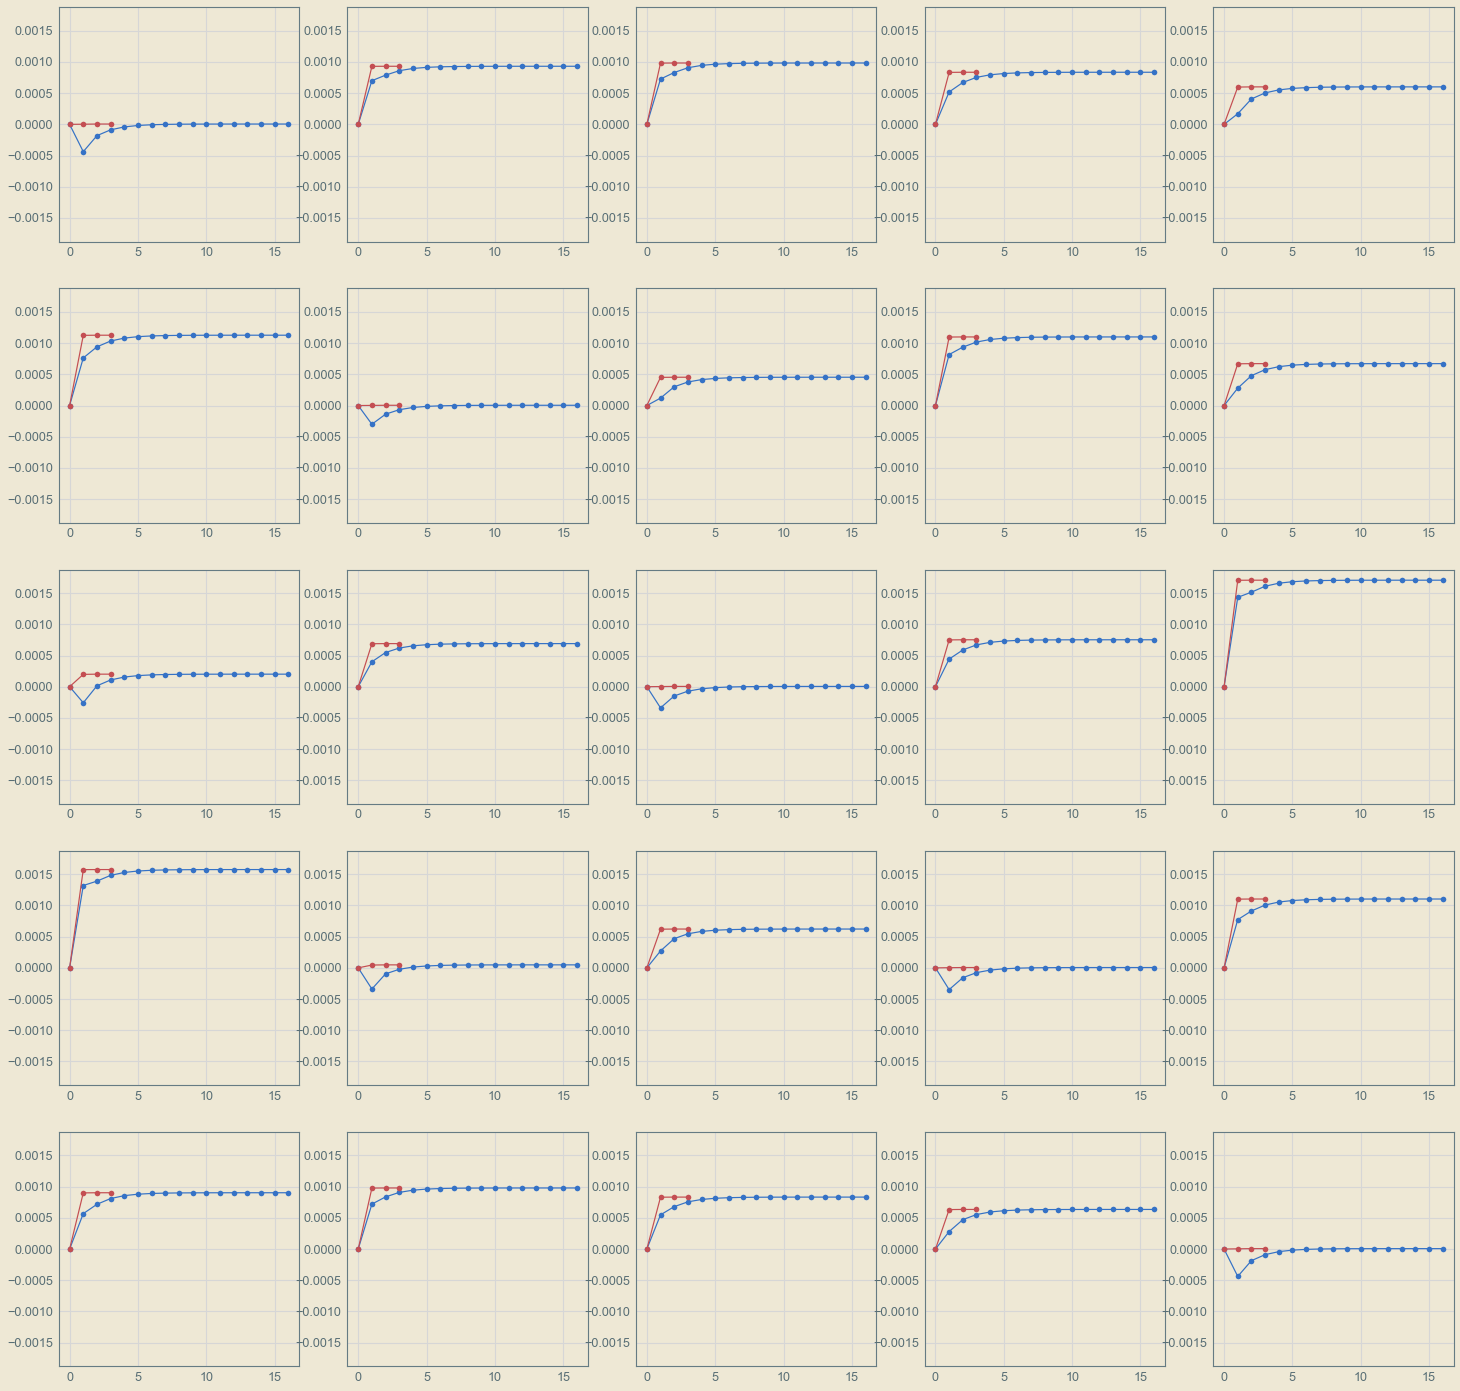

In [4]:
fig = plt.figure(figsize=(25,25))
ax = [[None] * m] * m
for i in range(m):
    for j in range(m):
        ax[i][j] = fig.add_subplot(m, m, m*i + j +1)
        ax[i][j].plot(range(iters), Xs[:,i,j], '-bo')
        ax[i][j].plot(range(len(Ss['Xs'])), Ys[:,i,j], '-ro')
        yl = np.max(np.abs(S0s['sol']))*1.1
        ax[i][j].set_ylim([-yl, yl])

In [5]:
d, X = nla.eig(-Ss['P_Xs'][-1])
print(d)
print(np.min(np.abs(d)))

[0.99      +0.j         0.99385909+0.00047458j 0.99385909-0.00047458j 0.99446123+0.00049851j 0.99446123-0.00049851j 0.99774987+0.j         0.99825687+0.0015851j  0.99825687-0.0015851j  0.99908714+0.j         1.00269576+0.00208105j 1.00269576-0.00208105j
 1.00209664+0.00205725j 1.00209664-0.00205725j 1.00353474+0.00049699j 1.00353474-0.00049699j 1.00269574+0.00108902j 1.00269574-0.00108902j 1.00293444+0.00047314j 1.00293444-0.00047314j 1.00209662+0.00111284j 1.00209662-0.00111284j 1.00219456+0.00049666j
 1.00219456-0.00049666j 1.00159465+0.00047283j 1.00159465-0.00047283j]
0.990000000251074


In [6]:
print(Ss['sol'])
print(S0s['sol'])
print(Ss['sol'] - S0s['sol'])

[[5.28963092e-06 9.31195160e-04 9.83302736e-04 8.35186874e-04 6.00730298e-04]
 [1.12722259e-03 4.06668019e-06 4.53530661e-04 1.09945301e-03 6.71431756e-04]
 [2.01081922e-04 6.90687828e-04 4.59883580e-06 7.52161438e-04 1.70717467e-03]
 [1.57579486e-03 4.82599537e-05 6.22411492e-04 5.49806776e-06 1.10374032e-03]
 [9.02477188e-04 9.78951947e-04 8.32666065e-04 6.34861153e-04 6.74834486e-06]]
[[5.27825673e-06 9.31186482e-04 9.83293425e-04 8.35176859e-04 6.00718471e-04]
 [1.12721122e-03 4.05800277e-06 4.53521350e-04 1.09944299e-03 6.71419929e-04]
 [2.01070548e-04 6.90679151e-04 4.58952518e-06 7.52151423e-04 1.70716285e-03]
 [1.57578349e-03 4.82512763e-05 6.22402182e-04 5.48805300e-06 1.10372850e-03]
 [9.02465814e-04 9.78943269e-04 8.32656755e-04 6.34851138e-04 6.73651799e-06]]
[[1.13741895e-08 8.67741919e-09 9.31062074e-09 1.00147543e-08 1.18268664e-08]
 [1.13741895e-08 8.67741920e-09 9.31062075e-09 1.00147543e-08 1.18268663e-08]
 [1.13741895e-08 8.67741921e-09 9.31062075e-09 1.00147543e-08 